In [1]:
%matplotlib inline


# Fit Specifying a Function to Compute the Jacobian

Specifying an analytical function to calculate the Jacobian can speed-up the
fitting procedure.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Minimizer, Parameters


def func(pars, x, data=None):
    a, b, c = pars['a'], pars['b'], pars['c']
    model = a * np.exp(-b*x) + c
    if data is None:
        return model
    return model - data


def dfunc(pars, x, data=None):
    a, b = pars['a'], pars['b']
    v = np.exp(-b*x)
    return np.array([v, -a*x*v, np.ones(len(x))])


def f(var, x):
    return var[0] * np.exp(-var[1]*x) + var[2]


params = Parameters()
params.add('a', value=10)
params.add('b', value=10)
params.add('c', value=10)

a, b, c = 2.5, 1.3, 0.8
x = np.linspace(0, 4, 50)
y = f([a, b, c], x)
data = y + 0.15*np.random.normal(size=x.size)

# fit without analytic derivative
min1 = Minimizer(func, params, fcn_args=(x,), fcn_kws={'data': data})
out1 = min1.leastsq()
fit1 = func(out1.params, x)

# fit with analytic derivative
min2 = Minimizer(func, params, fcn_args=(x,), fcn_kws={'data': data})
out2 = min2.leastsq(Dfun=dfunc, col_deriv=1)
fit2 = func(out2.params, x)

Comparison of fit to exponential decay with/without analytical derivatives
to model = a*exp(-b*x) + c



In [3]:
print('''
"true" parameters are: a = %.3f, b = %.3f, c = %.3f

==============================================
Statistic/Parameter|   Without   | With      |
----------------------------------------------
N Function Calls   |   %3i       |   %3i     |
Chi-square         |   %.4f    |   %.4f  |
   a               |   %.4f    |   %.4f  |
   b               |   %.4f    |   %.4f  |
   c               |   %.4f    |   %.4f  |
----------------------------------------------
''' % (a, b, c,
       out1.nfev, out2.nfev,
       out1.chisqr, out2.chisqr,
       out1.params['a'], out2.params['a'],
       out1.params['b'], out2.params['b'],
       out1.params['c'], out2.params['c']))


"true" parameters are: a = 2.500, b = 1.300, c = 0.800

Statistic/Parameter|   Without   | With      |
----------------------------------------------
N Function Calls   |    40       |    13     |
Chi-square         |   1.6335    |   1.6335  |
   a               |   2.4707    |   2.4707  |
   b               |   1.3263    |   1.3263  |
   c               |   0.8077    |   0.8077  |
----------------------------------------------



and the best-fit to the synthetic data (with added noise) is the same for
both methods:



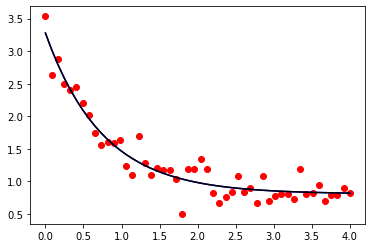

In [4]:
plt.plot(x, data, 'ro')
plt.plot(x, fit1, 'b')
plt.plot(x, fit2, 'k')
plt.show()